# Gundabattula Madhuri
# Task 1 :- Stock Market  Prediction 
### Take stock price of any company you want and predicts its price by using LSTM.
# Bharat Intern 

### Libraries required

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('AAPL.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-18,44.452499,44.705002,44.220001,44.459999,42.384655,83018000
1,2018-04-19,43.439999,43.847500,43.165001,43.200001,41.183468,139235200
2,2018-04-20,42.650002,42.805000,41.357498,41.430000,39.496098,261964400
3,2018-04-23,41.707500,41.730000,41.022499,41.310001,39.381687,146062000
4,2018-04-24,41.417500,41.582500,40.305000,40.735001,38.833546,134768000


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-04-11,162.350006,162.360001,160.509995,160.800003,160.800003,47644200
1254,2023-04-12,161.220001,162.059998,159.779999,160.100006,160.100006,50133100
1255,2023-04-13,161.630005,165.800003,161.419998,165.559998,165.559998,68445600
1256,2023-04-14,164.589996,166.320007,163.820007,165.210007,165.210007,49337200
1257,2023-04-17,165.089996,165.389999,164.029999,165.229996,165.229996,41485300


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df1=df.reset_index()['Close']

In [8]:
df1.shape

(1258,)

In [9]:
df1

0        44.459999
1        43.200001
2        41.430000
3        41.310001
4        40.735001
           ...    
1253    160.800003
1254    160.100006
1255    165.559998
1256    165.210007
1257    165.229996
Name: Close, Length: 1258, dtype: float64

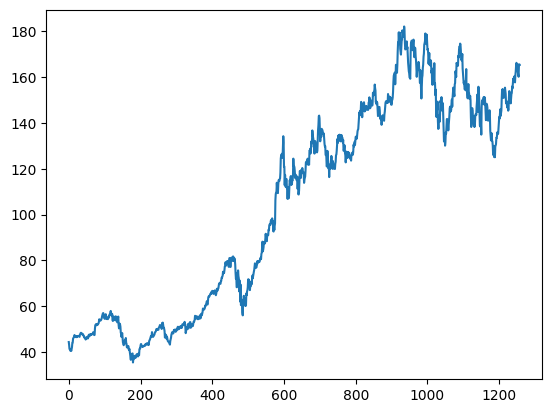

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

# Lstm  are sensitive to the scale  of the data so we apply MinMax scaler

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.06085174],
       [0.05224887],
       [0.04016386],
       ...,
       [0.88768458],
       [0.88529495],
       [0.88543143]])

In [14]:
df1.shape 

(1258, 1)

# splitting dataset  into train and test split

In [15]:
training_size=int(len(df1)*0.65)
test_size= len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(817, 441)

In [17]:
len(train_data), len(test_data)

(817, 441)

In [18]:
train_data

array([[0.06085174],
       [0.05224887],
       [0.04016386],
       [0.03934454],
       [0.03541862],
       [0.03663052],
       [0.03760348],
       [0.03436034],
       [0.03937867],
       [0.04593327],
       [0.05868397],
       [0.05923017],
       [0.07107621],
       [0.07334642],
       [0.07486558],
       [0.07710164],
       [0.08167618],
       [0.07920115],
       [0.0784501 ],
       [0.07553128],
       [0.07850131],
       [0.07647009],
       [0.07530937],
       [0.07756252],
       [0.07676027],
       [0.07880857],
       [0.0784501 ],
       [0.07918409],
       [0.07802337],
       [0.07734061],
       [0.07626525],
       [0.08201758],
       [0.08473158],
       [0.08725782],
       [0.08840146],
       [0.08751388],
       [0.08450968],
       [0.08370742],
       [0.0854997 ],
       [0.08280275],
       [0.08297346],
       [0.07962788],
       [0.0794572 ],
       [0.07425109],
       [0.07563369],
       [0.07385851],
       [0.07293675],
       [0.068

In [19]:
test_data

array([[0.75679783],
       [0.72989673],
       [0.75515915],
       [0.75003839],
       [0.75959721],
       [0.77161391],
       [0.77454986],
       [0.75939239],
       [0.74717077],
       [0.75167707],
       [0.75317917],
       [0.75085778],
       [0.7634207 ],
       [0.76062132],
       [0.76137238],
       [0.75509091],
       [0.75474951],
       [0.75140401],
       [0.75317917],
       [0.77386705],
       [0.77530091],
       [0.78909276],
       [0.78274306],
       [0.75659302],
       [0.7589144 ],
       [0.76908769],
       [0.77946581],
       [0.77885123],
       [0.77024839],
       [0.76464963],
       [0.77188707],
       [0.80274814],
       [0.79394047],
       [0.79858325],
       [0.8063668 ],
       [0.81080486],
       [0.82712302],
       [0.81633527],
       [0.80923452],
       [0.77441328],
       [0.77837335],
       [0.7686097 ],
       [0.77482292],
       [0.77318424],
       [0.75454469],
       [0.73324233],
       [0.73658784],
       [0.753

# convert an array of values into a dataset matrix

In [20]:
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

# reshape input to be [samples, time steps, features] which is required for LSTM

In [24]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Create the Stacked LSTM model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 433ms/step - loss: 0.0301 - val_loss: 0.0545
Epoch 2/100
12/12 [==============================] - 3s 269ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 3/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 4/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0016 - val_loss: 0.0042
Epoch 5/100
12/12 [==============================] - 3s 258ms/step - loss: 0.0013 - val_loss: 0.0054
Epoch 6/100
12/12 [==============================] - 3s 273ms/step - loss: 0.0013 - val_loss: 0.0044
Epoch 7/100
12/12 [==============================] - 3s 258ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 8/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 9/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 10/100
12/12 [==============================] - 3s 258ms/step - loss: 0.0013 - val_l

In [30]:
import tensorflow as tf

In [31]:
tf.__version__


'2.12.0'

## Lets Do the prediction and check performance metrics

In [32]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 59ms/step


## Transformback to original form

In [33]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


## Calculate RMSE performance metrics

In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

89.0716851155777

## Test Data RMSE

In [35]:
math.sqrt(mean_squared_error(ytest,test_predict))

153.3721284239867

# Plotting 

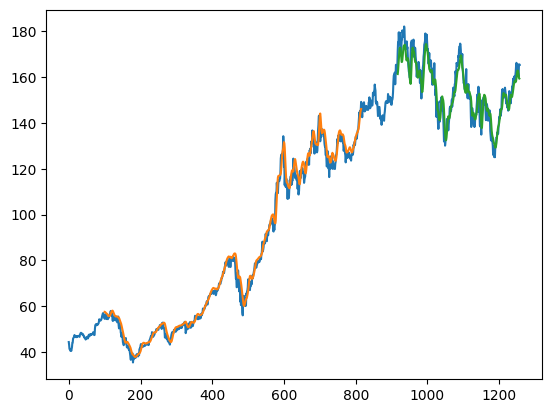

In [36]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

441

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.7678586573843269,
 0.7826747235370717,
 0.7887514601519761,
 0.7685414670051982,
 0.7419817663353458,
 0.7211573018823509,
 0.7679952384260234,
 0.7699069838316424,
 0.7664931405578825,
 0.758436518225615,
 0.7330375174411545,
 0.7195869612871675,
 0.731262250661934,
 0.7279167525305148,
 0.7438252690139224,
 0.7505163745197456,
 0.7350858438884702,
 0.6892720193608066,
 0.6756848889928093,
 0.661073639781117,
 0.660595756344283,
 0.682102928002851,
 0.6601177704921508,
 0.6575915606080012,
 0.6450968805706669,
 0.6178544249014359,
 0.6422292658760818,
 0.6444140709497956,
 0.6112315621226552,
 0.6200392845966423,
 0.6108901573122196,
 0.6422975017754375,
 0.6459161688179365,
 0.6498762406708711,
 0.6687207169912046,
 0.6681744952397164,
 0.6773918106296895,
 0.6854485285495684,
 0.6804643515083117,
 0.6808739922181033,
 0.6986259157924759,
 0.7207476611725594,
 0.7304429624146644,
 0.7258684260831993,
 0.7402066087991099,
 0.7536570557101123,
 0.7336519819196852,
 0.74245964977218,

# demonstrate prediction for next 10 days

In [41]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.85440296]
101
1 day input [0.78267472 0.78875146 0.76854147 0.74198177 0.7211573  0.76799524
 0.76990698 0.76649314 0.75843652 0.73303752 0.71958696 0.73126225
 0.72791675 0.74382527 0.75051637 0.73508584 0.68927202 0.67568489
 0.66107364 0.66059576 0.68210293 0.66011777 0.65759156 0.64509688
 0.61785442 0.64222927 0.64441407 0.61123156 0.62003928 0.61089016
 0.6422975  0.64591617 0.64987624 0.66872072 0.6681745  0.67739181
 0.68544853 0.68046435 0.68087399 0.69862592 0.72074766 0.73044296
 0.72586843 0.74020661 0.75365706 0.73365198 0.74245965 0.75024321
 0.78704454 0.81217038 0.79325766 0.81319449 0.79455493 0.78738584
 0.78834172 0.80773242 0.80329436 0.81783737 0.80677655 0.79885641
 0.77106768 0.77400364 0.77734913 0.75898275 0.76724419 0.76376211
 0.74942392 0.75352058 0.7884783  0.80759584 0.79237013 0.80104121
 0.7854741  0.77120426 0.78465481 0.79912947 0.8018606  0.8213878
 0.81558422 0.83197063 0.84480671 0.83490659 0.84241698 0.85142957
 0.83797903 0.83367755 0.85498    

8 day output [[0.81546205]]
9 day input [0.75843652 0.73303752 0.71958696 0.73126225 0.72791675 0.74382527
 0.75051637 0.73508584 0.68927202 0.67568489 0.66107364 0.66059576
 0.68210293 0.66011777 0.65759156 0.64509688 0.61785442 0.64222927
 0.64441407 0.61123156 0.62003928 0.61089016 0.6422975  0.64591617
 0.64987624 0.66872072 0.6681745  0.67739181 0.68544853 0.68046435
 0.68087399 0.69862592 0.72074766 0.73044296 0.72586843 0.74020661
 0.75365706 0.73365198 0.74245965 0.75024321 0.78704454 0.81217038
 0.79325766 0.81319449 0.79455493 0.78738584 0.78834172 0.80773242
 0.80329436 0.81783737 0.80677655 0.79885641 0.77106768 0.77400364
 0.77734913 0.75898275 0.76724419 0.76376211 0.74942392 0.75352058
 0.7884783  0.80759584 0.79237013 0.80104121 0.7854741  0.77120426
 0.78465481 0.79912947 0.8018606  0.8213878  0.81558422 0.83197063
 0.84480671 0.83490659 0.84241698 0.85142957 0.83797903 0.83367755
 0.85498    0.865836   0.88317828 0.89184947 0.88816256 0.87539472
 0.8815397  0.86358285

17 day output [[0.7930549]]
18 day input [0.67568489 0.66107364 0.66059576 0.68210293 0.66011777 0.65759156
 0.64509688 0.61785442 0.64222927 0.64441407 0.61123156 0.62003928
 0.61089016 0.6422975  0.64591617 0.64987624 0.66872072 0.6681745
 0.67739181 0.68544853 0.68046435 0.68087399 0.69862592 0.72074766
 0.73044296 0.72586843 0.74020661 0.75365706 0.73365198 0.74245965
 0.75024321 0.78704454 0.81217038 0.79325766 0.81319449 0.79455493
 0.78738584 0.78834172 0.80773242 0.80329436 0.81783737 0.80677655
 0.79885641 0.77106768 0.77400364 0.77734913 0.75898275 0.76724419
 0.76376211 0.74942392 0.75352058 0.7884783  0.80759584 0.79237013
 0.80104121 0.7854741  0.77120426 0.78465481 0.79912947 0.8018606
 0.8213878  0.81558422 0.83197063 0.84480671 0.83490659 0.84241698
 0.85142957 0.83797903 0.83367755 0.85498    0.865836   0.88317828
 0.89184947 0.88816256 0.87539472 0.8815397  0.86358285 0.85518482
 0.85040546 0.88768458 0.88529495 0.88543143 0.85440296 0.85450828
 0.85077226 0.84514236 

26 day output [[0.79571635]]
27 day input [0.64441407 0.61123156 0.62003928 0.61089016 0.6422975  0.64591617
 0.64987624 0.66872072 0.6681745  0.67739181 0.68544853 0.68046435
 0.68087399 0.69862592 0.72074766 0.73044296 0.72586843 0.74020661
 0.75365706 0.73365198 0.74245965 0.75024321 0.78704454 0.81217038
 0.79325766 0.81319449 0.79455493 0.78738584 0.78834172 0.80773242
 0.80329436 0.81783737 0.80677655 0.79885641 0.77106768 0.77400364
 0.77734913 0.75898275 0.76724419 0.76376211 0.74942392 0.75352058
 0.7884783  0.80759584 0.79237013 0.80104121 0.7854741  0.77120426
 0.78465481 0.79912947 0.8018606  0.8213878  0.81558422 0.83197063
 0.84480671 0.83490659 0.84241698 0.85142957 0.83797903 0.83367755
 0.85498    0.865836   0.88317828 0.89184947 0.88816256 0.87539472
 0.8815397  0.86358285 0.85518482 0.85040546 0.88768458 0.88529495
 0.88543143 0.85440296 0.85450828 0.85077226 0.84514236 0.83883125
 0.83246917 0.82636189 0.82066447 0.81546205 0.81080496 0.80671972
 0.80321479 0.800281

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1258

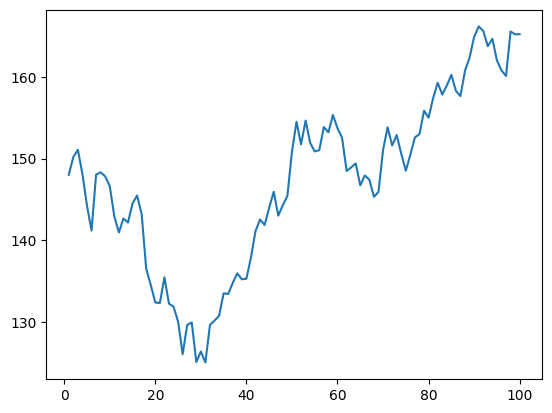

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))


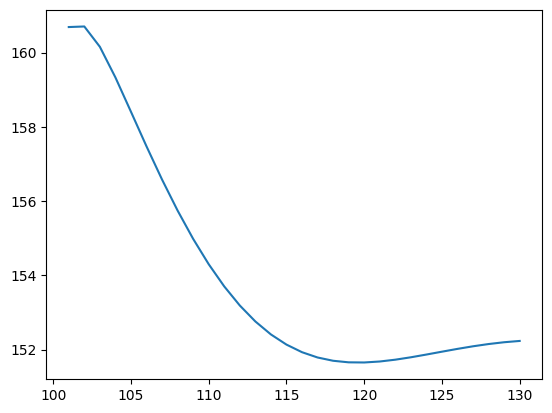

In [46]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

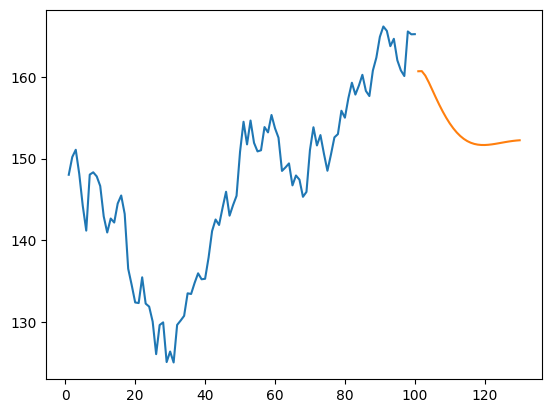

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

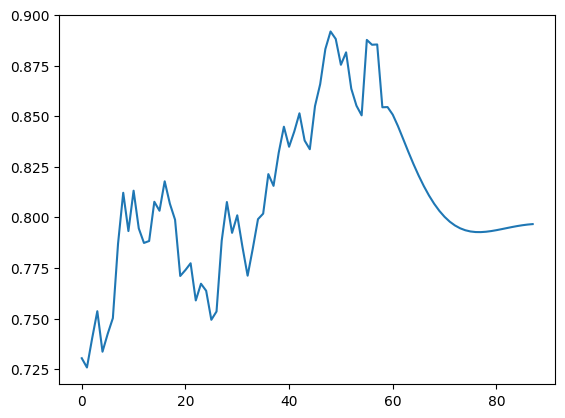

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

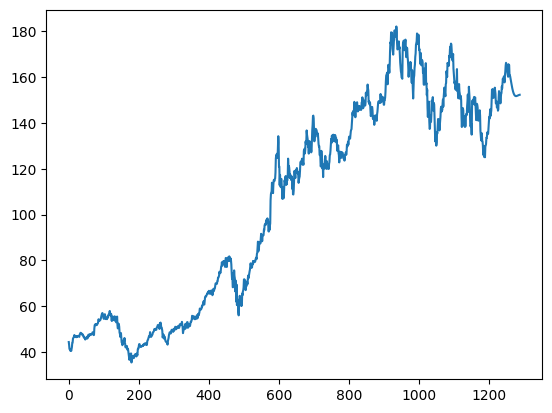

In [50]:
plt.plot(df3)